# Keypoint Matches

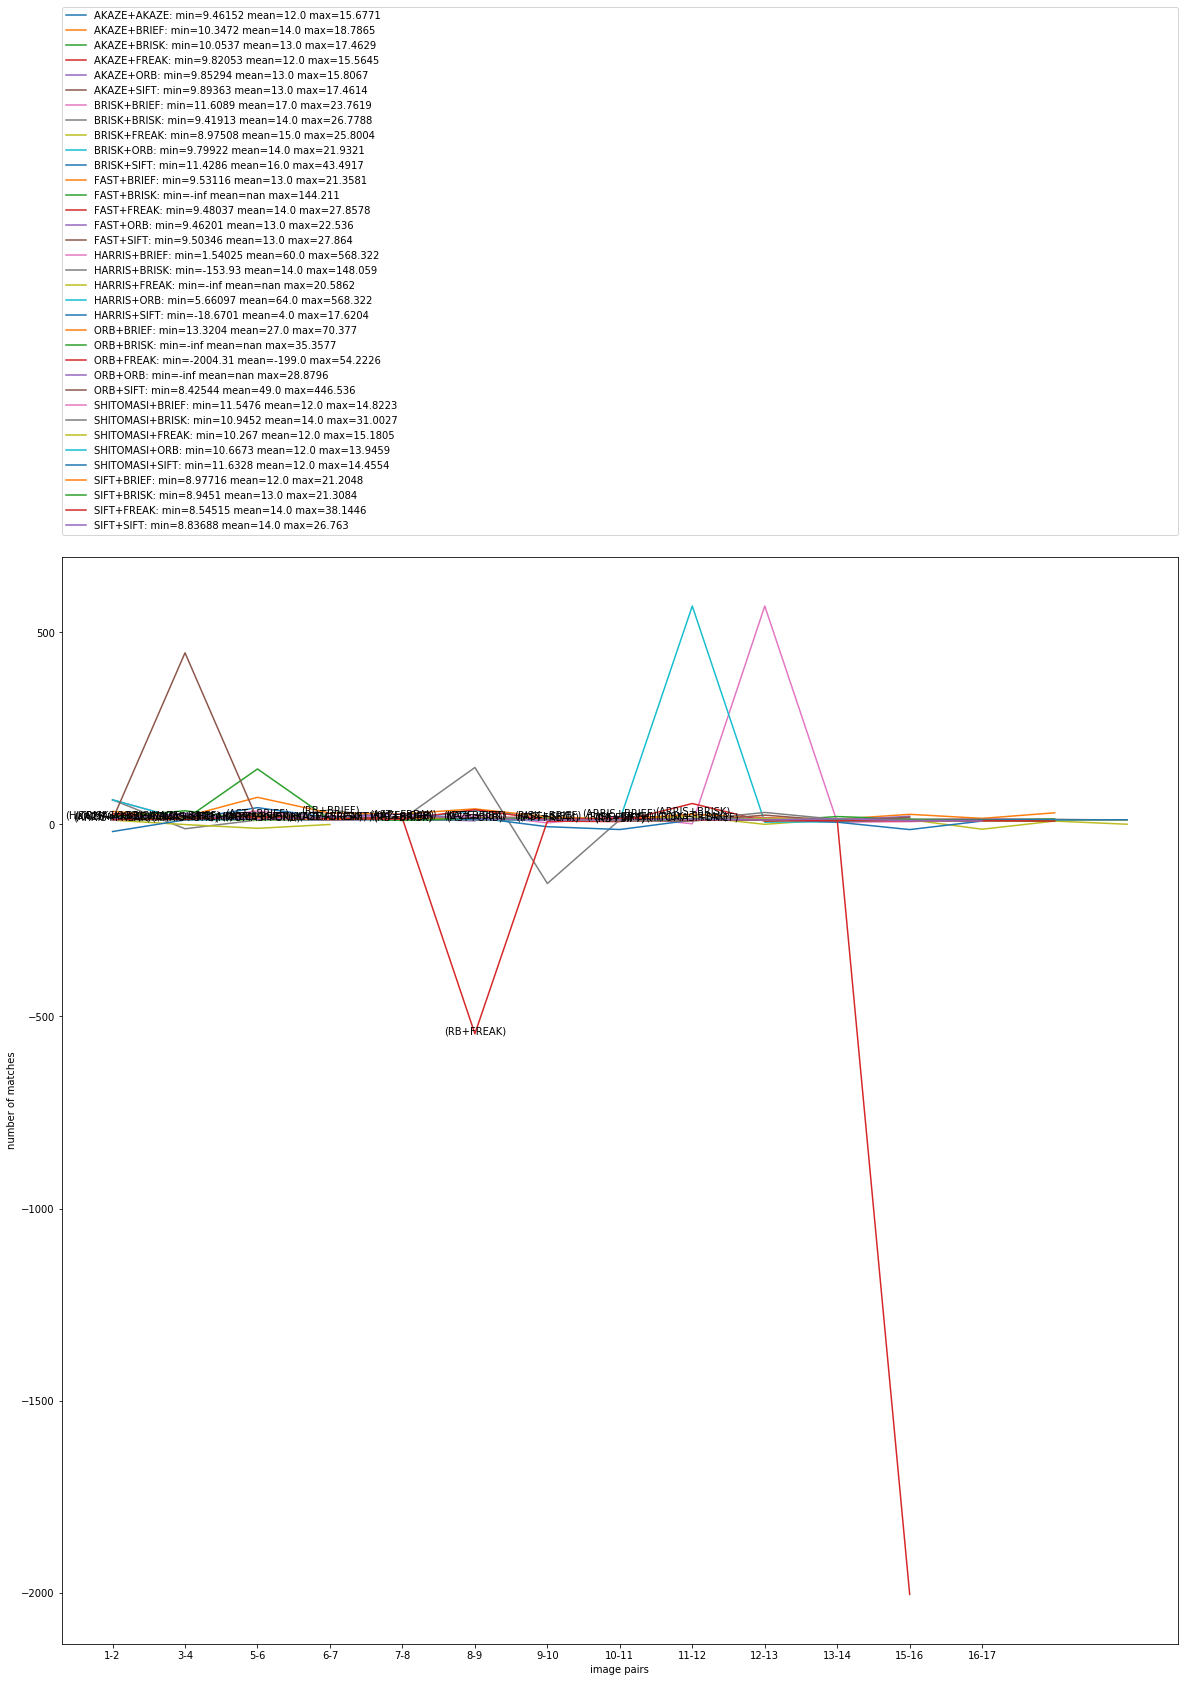

In [8]:
import os
import csv
import numpy as np
from glob import glob
from collections import OrderedDict
import matplotlib.pyplot as plt

data_dir = "data"

data = OrderedDict()

# read data
class LineWrapper:
    def __init__(self, detector, descriptor, lst):
        self._lst = lst
        self._detector = detector
        self._descriptor = descriptor
        
    def detector():
        return self._detector
    
    def descriptor():
        return self._descriptor
        
    def prev_img(self):
        return int(self._lst[0]) - 1
    
    def cur_img(self):
        return int(self._lst[0])
    
    def camera_ttc(self):
        return float(self._lst[1])
    
    def lidar_ttc(self):
        return float(self._lst[2])

files = glob(os.path.join(data_dir, '*_statistics.txt'))
for file in files:
    
    detector = file.split('_')[0].split('/')[-1]
    descriptor = file.split('_')[1]
    
    key = detector + '+' + descriptor
    
    with open(file) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        
        data[key] = OrderedDict()
        
        for row in csv_reader:
            if row[0][0] == '#':
                continue
            lw = LineWrapper(detector, descriptor, row)
            inner_key = str(lw.prev_img()) + '-' + str(lw.cur_img())
            data[key][inner_key] = lw.camera_ttc()
            
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
label_helper = dict()
for combination_id, combination_dict in data.items():
    x = np.arange(0, len(combination_dict), 1)
    y = list(combination_dict.values())
    
    if not label_helper.get(tuple(y), None):
        label_helper[tuple(y)] = []
    label_helper[tuple(y)].append(combination_id[1:].split(')')[0])

for combination_id, combination_dict in data.items():
    x = np.arange(0, len(combination_dict), 1)
    y = list(combination_dict.values())
    
    ax.plot(x, y,
            label=combination_id + ": min=" + str(min(combination_dict.values()))
                  + " mean=" + str(sum(combination_dict.values()) // len(combination_dict.values())) 
                  + " max=" + str(max(combination_dict.values())))
    
    ax.set_xticks(np.arange(0, len(combination_dict), 1))
    ax.set_xticklabels(combination_dict.keys())
    ax.set_xlabel('image pairs')
    ax.set_ylabel('number of matches')
    
pos = 0
for line, ids in label_helper.items():
    ax.annotate('(' + ','.join(ids) + ')', # this is the text
                (pos, line[pos]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    pos = (pos + 1) % 9
    
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

plt.show()